VF Model: Jupyter notebook guide
================================

Updated on 1/23/2018 by Marc Anoma

This Jupyter notebook demonstrates how to use the package for irradiance calculations.

<h3>Imports and settings</h3>

In [1]:
# Import external libraries
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

# Import class from package
from pvfactors.pvarray import Array
from pvfactors.tools import (plot_surface_registry, 
                            calculate_radiosities_serially_perez)

# Settings
% matplotlib inline
np.set_printoptions(precision=3, linewidth=300)

## Create PV Array of 3 rows

We provide 2 examples for creating PV arrays.

* one where the PV array is created with continuous array surfaces
* and one where we discretize the front surface of the middle PV row

In [2]:
# Arguments
arguments = {
    'n_pvrows': 3,
    'pvrow_height': 1.75,
    'pvrow_width': 2.44,
    'array_azimuth': 90.,  # south-north oriented torque-tubes
    'array_tilt': 20.,  # positive rotation angles in the east
    'gcr': 0.4,
    'solar_zenith': 20.,
    'solar_azimuth': 90.,  # sun located in the east
    'rho_ground': 0.2,
    'rho_front_pvrow': 0.01,
    'rho_back_pvrow': 0.03
}

In [3]:
# Create array object
array_simple = Array(**arguments)

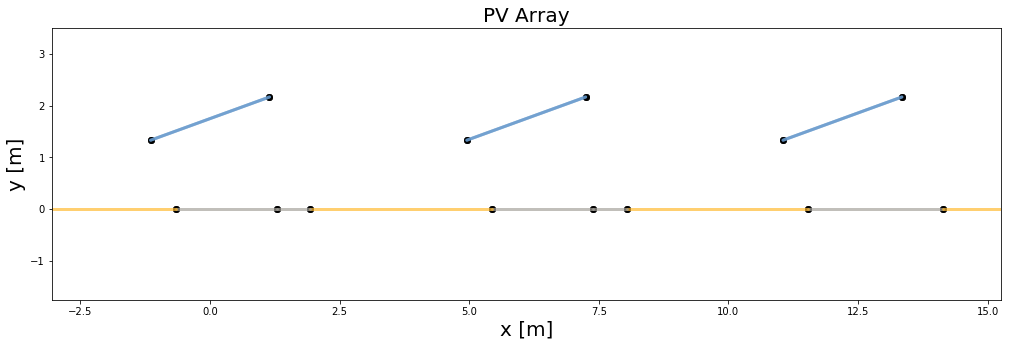

In [4]:
# Plot the PV array geometry
f, ax = plt.subplots(figsize=(17, 5))
plot_surface_registry(ax, array_simple)
plt.show()

Discretize the front surface of middle tracker into 5 segments

In [5]:
# Add discretization option into arguments
arguments_discretize = arguments.copy()
arguments_discretize['cut'] = [(1, 5, 'front')]

In [6]:
# Create array object
array_discretized = Array(**arguments_discretize)

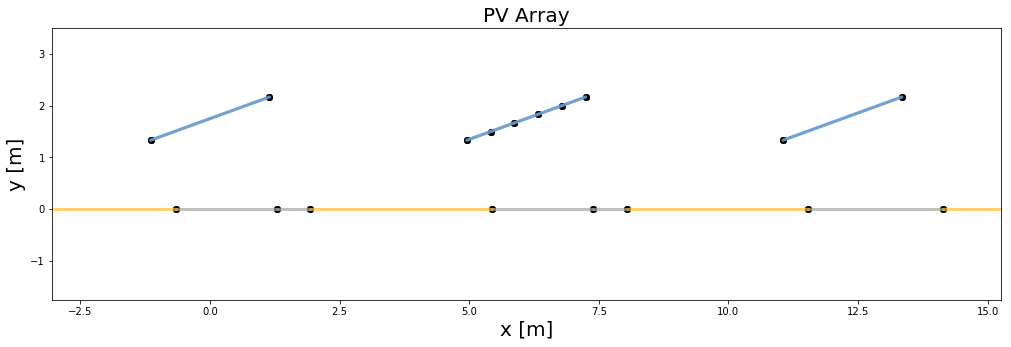

In [7]:
# Plot the PV array geometry
f, ax = plt.subplots(figsize=(17, 5))
plot_surface_registry(ax, array_discretized)
plt.show()

The PV array and solar angles can be updated as follows:<br>
For example, we can rotate the array to -20 degrees

In [8]:
solar_zenith = 20.
solar_azimuth = 90.
array_tilt = -20.
array_azimuth = 90.
array_discretized.update_view_factors(solar_zenith, solar_azimuth, 
                                      array_tilt, array_azimuth)

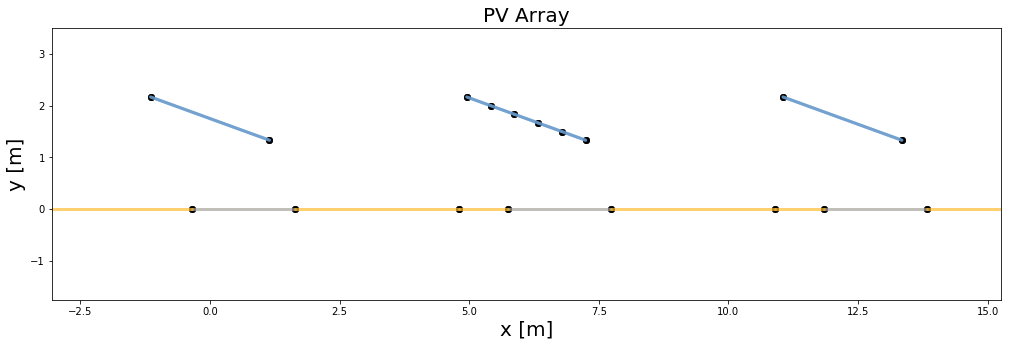

In [9]:
# Plot the PV array geometry
f, ax = plt.subplots(figsize=(17,5))
plot_surface_registry(ax, array_discretized)
plt.show()

## Direct shading: still in development

We can also look at cases of direct shading, but that part needs more development.

In [10]:
solar_zenith = 80.
solar_azimuth = 90.
array_tilt = 70.
array_azimuth = 90.
array_simple.update_view_factors(solar_zenith, solar_azimuth, 
                                 array_tilt, array_azimuth)

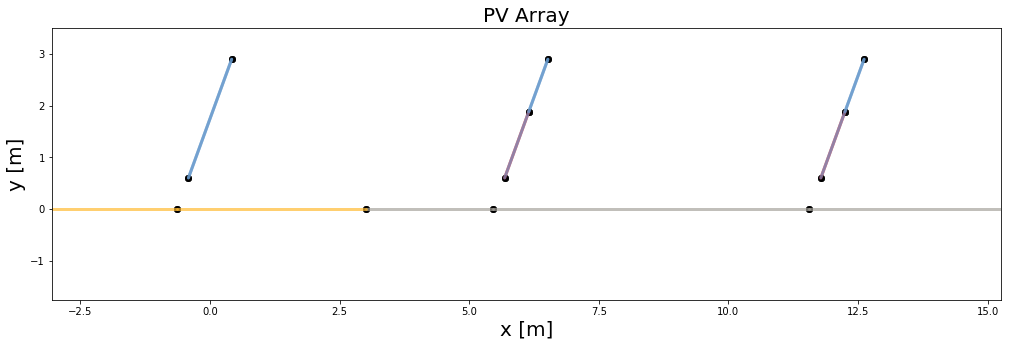

In [11]:
# Plot the PV array geometry
f, ax = plt.subplots(figsize=(17,5))
plot_surface_registry(ax, array_simple)
plt.show()

We can see in the figure above that the middle and the right trackers are undergoing some row-to-row shading

## Surface Registry

The surface registry of the array contains all the info necessary for the calculations, including the ``shapely`` geometries.<br>
The user can for instance select elements of the PV array by filtering on "line_type" (PV row or ground surface), "shaded" (is the surface shaded?), "surface_side" (which side of the surface), etc.

In [12]:
array_simple.surface_registry.head()

line_registry_index pvrow_index  \
0                    0           0   
1                    1           1   
2                    2           2   
3                    3        None   
4                    4        None   

                                            geometry style shaded line_type  \
0  LINESTRING (-0.4172645748573156 0.603575002641...     -  False     pvrow   
1  LINESTRING (6.149389561651357 1.88569670539386...     -  False     pvrow   
2  LINESTRING (12.24938956165136 1.88569670539386...     -  False     pvrow   
3  LINESTRING (3.005779364397384 0, 5.46305209003...     -   True    ground   
4         LINESTRING (-100 0, -0.6369479099658548 0)     -  False    ground   

                      edge_point surface_side  irradiance_term  reflectivity  \
0  POINT (-0.6369479099658538 0)        front              NaN           NaN   
1    POINT (5.463052090034146 0)        front              NaN           NaN   
2    POINT (11.56305209003415 0)        front              NaN           NaN   
3                            NaN        front              NaN           NaN   
4                            NaN        front              NaN           NaN   

   q0  qinc       area  index_pvrow_neighbor  
0 NaN   NaN   2.440000                   NaN  
1 NaN   NaN   1.075595                   0.0  
2 NaN   NaN   1.075595                   1.0  
3 NaN   NaN   2.457273                   NaN  
4 NaN   NaN  99.363052                   NaN

## View factor matrix

The view factor matrix of the array is automatically calculated when the array is created or updated.

In [13]:
# Calculate matrix
array_simple.vf_matrix

array([[ 0.   ,  0.   ,  0.   ,  0.   ,  0.321,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.679],
       [ 0.   ,  0.   ,  0.   ,  0.088,  0.029,  0.   ,  0.098,  0.   ,  0.   ,  0.   ,  0.   ,  0.155,  0.   ,  0.   ,  0.   ,  0.   ,  0.63 ],
       [ 0.   ,  0.   ,  0.   ,  0.028,  0.   ,  0.   ,  0.   ,  0.186,  0.   ,  0.   ,  0.   ,  0.   ,  0.078,  0.   ,  0.078,  0.   ,  0.63 ],
       [ 0.   ,  0.039,  0.012,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.09 ,  0.012,  0.102,  0.   ,  0.   ,  0.   ,  0.   ,  0.745],
       [ 0.008,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.001,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.991],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.001,  0.   ,  0.001,  0.999],
       [ 0.   ,  0.029,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.031,  0.004,  0.279,  0.   ,  0.   ,  0.   ,  0

The view matrix lines and columns can be labeled using the surface registry

In [14]:
# Create labels for the matrix
registry = array_simple.surface_registry
registry.loc[registry.line_type == 'ground', 'pvrow_index'] = range(
    registry.loc[registry.line_type == 'ground', :].shape[0])
labels = (registry.line_type.values + "_" + 
          registry.pvrow_index.values.astype(str) + "_" + 
          registry.surface_side.values)

# Show the matrix with labels
labeled_vf_matrix = pd.DataFrame(array_simple.vf_matrix[:-1, :-1], 
                                 index=labels, columns=labels)
labeled_vf_matrix

pvrow_0_front  pvrow_1_front  pvrow_2_front  ground_0_front  \
pvrow_0_front        0.000000       0.000000       0.000000        0.000000   
pvrow_1_front        0.000000       0.000000       0.000000        0.088091   
pvrow_2_front        0.000000       0.000000       0.000000        0.028318   
ground_0_front       0.000000       0.038559       0.012395        0.000000   
ground_1_front       0.007878       0.000311       0.000000        0.000000   
ground_2_front       0.000000       0.000000       0.000000        0.000000   
ground_3_front       0.000000       0.028997       0.000112        0.000000   
ground_4_front       0.000000       0.000000       0.032849        0.000000   
ground_5_front       0.000000       0.000000       0.000000        0.000000   
pvrow_1_front        0.000000       0.000000       0.000000        0.162252   
pvrow_2_front        0.000000       0.000000       0.000000        0.021514   
pvrow_0_back         0.000000       0.068373       0.000000        0.102848   
pvrow_1_back         0.000000       0.000000       0.077596        0.000000   
pvrow_2_back         0.000000       0.000000       0.000000        0.000000   
pvrow_1_back         0.000000       0.000000       0.061102        0.000000   
pvrow_2_back         0.000000       0.000000       0.000000        0.000000   

                ground_1_front  ground_2_front  ground_3_front  \
pvrow_0_front         0.320807        0.000000        0.000000   
pvrow_1_front         0.028697        0.000000        0.098204   
pvrow_2_front         0.000000        0.000000        0.000379   
ground_0_front        0.000000        0.000000        0.000000   
ground_1_front        0.000000        0.000000        0.000000   
ground_2_front        0.000000        0.000000        0.000000   
ground_3_front        0.000000        0.000000        0.000000   
ground_4_front        0.000000        0.000000        0.000000   
ground_5_front        0.000000        0.000000        0.000000   
pvrow_1_front         0.038206        0.000000        0.083054   
pvrow_2_front         0.005133        0.000000        0.011564   
pvrow_0_back          0.000000        0.000307        0.416251   
pvrow_1_back          0.000000        0.000000        0.000000   
pvrow_2_back          0.000000        0.055848        0.000000   
pvrow_1_back          0.000000        0.000960        0.000000   
pvrow_2_back          0.000000        0.028140        0.000000   

                ground_4_front  ground_5_front  pvrow_1_front  pvrow_2_front  \
pvrow_0_front         0.000000        0.000000       0.000000       0.000000   
pvrow_1_front         0.000000        0.000000       0.000000       0.000000   
pvrow_2_front         0.186295        0.000000       0.000000       0.000000   
ground_0_front        0.000000        0.000000       0.090091       0.011945   
ground_1_front        0.000000        0.000000       0.000525       0.000070   
ground_2_front        0.000000        0.000000       0.000000       0.000000   
ground_3_front        0.000000        0.000000       0.031108       0.004332   
ground_4_front        0.000000        0.000000       0.000000       0.054868   
ground_5_front        0.000000        0.000000       0.000000       0.000000   
pvrow_1_front         0.000000        0.000000       0.000000       0.000000   
pvrow_2_front         0.245306        0.000000       0.000000       0.000000   
pvrow_0_back          0.050835        0.002887       0.105148       0.000000   
pvrow_1_back          0.460332        0.055650       0.000000       0.113922   
pvrow_2_back          0.000000        0.602271       0.000000       0.000000   
pvrow_1_back          0.565426        0.051783       0.000000       0.098231   
pvrow_2_back          0.000000        0.636202       0.000000       0.000000   

                pvrow_0_back  pvrow_1_back  pvrow_2_back  pvrow_1_back  \
pvrow_0_front       0.000000      0.000000      0.000000      0.000000   
pvrow_1_front       0.155105      0.0000

## Calculate radiosities for single time point and using isotropic diffuse sky dome

In [15]:
# Define input values for radiosity calculation
DNI = 1000.
DHI = 50.
solar_zenith = 20.
solar_azimuth = 90.
array_tilt = -20.
array_azimuth = 90.

In [16]:
array_simple.calculate_radiosities_simple(solar_zenith, solar_azimuth,
                                          array_tilt, array_azimuth,
                                          DNI, DHI)

In [17]:
array_simple.surface_registry[['pvrow_index', 'shaded', 'line_type', 
                               'surface_side', 'irradiance_term', 'q0', 
                               'qinc', 'isotropic_term', 'reflection_term']]

pvrow_index shaded line_type surface_side  irradiance_term          q0  \
0            0  False     pvrow        front       766.044443    8.168828   
1            1  False     pvrow        front       766.044443    8.173178   
2            2  False     pvrow        front       766.044443    8.200154   
3         None   True    ground        front         0.000000    5.297125   
4         None   True    ground        front         0.000000    5.297799   
5         None   True    ground        front         0.000000    5.693934   
6         None  False    ground        front       939.692621  195.553701   
7         None  False    ground        front       939.692621  195.651303   
8         None  False    ground        front       939.692621  197.806118   
9         None  False    ground        front       939.692621  197.396142   
10        None  False    ground        front       939.692621  193.168551   
11        None  False    ground        front       939.692621  193.376337   
12        None  False    ground        front       939.692621  197.927305   
13           0  False     pvrow         back         0.000000    3.642228   
14           1  False     pvrow         back         0.000000    3.285173   
15           2  False     pvrow         back         0.000000    3.258358   

          qinc  isotropic_term  reflection_term  
0   816.882800       47.572225         3.266131  
1   817.317825       47.573077         3.700304  
2   820.015392       48.657804         5.313145  
3    26.485623       24.658496         1.827127  
4    26.488993       24.815420         1.673573  
5    28.469672       26.933075         1.536597  
6   977.768507       37.217601         0.858285  
7   978.256514       37.744932         0.818961  
8   989.030592       49.286484         0.051487  
9   986.980708       47.067908         0.220179  
10  965.842753       24.463549         1.686584  
11  966.881685       25.572293         1.616771  
12  989.636525       49.932918         0.010986  
13  121.407597        1.661115       119.746482  
14  109.505752        1.088744       108.417008  
15  108.611941        1.088193       107.523748

We can also use ``calculate_radiosities_perez()`` method, but it requires providing additional inputs from the Perez model

## Timeseries calculation of radiosity terms

### For simple continuous surfaces

The user can use the function from the ``tools`` module named ``calculate_radiosities_serially_perez()``, which will pre-calculate the necessary inputs from the Perez model using the ``pvlib`` library.<br>
The user can also use ``calculate_radiosities_parallel_perez()``, which will run the same calculations but in parallel processes.

Let's create some inputs for the function.
<br> PLEASE NOTE THAT THE COLUMN NAMES NEED TO BE EXACTLY THE ONES SHOWN BELOW.

In [18]:
df_inputs = pd.DataFrame(
    np.array(
        [[20., 110., 10., 90., 1000., 50.],
         [10., 140., 0., 90., 300., 500.]]),
    columns = ['solar_zenith', 'solar_azimuth', 'array_tilt', 'array_azimuth', 'dni', 'dhi'],
    index = pd.DatetimeIndex(
        [datetime(2017, 8, 31, 11), datetime(2017, 8, 31, 12)]
    )
)
df_inputs

solar_zenith  solar_azimuth  array_tilt  array_azimuth  \
2017-08-31 11:00:00          20.0          110.0        10.0           90.0   
2017-08-31 12:00:00          10.0          140.0         0.0           90.0   

                        dni    dhi  
2017-08-31 11:00:00  1000.0   50.0  
2017-08-31 12:00:00   300.0  500.0

That's all we need to run a calculation

In [19]:
df_outputs, df_bifacial_gain, df_inputs_perez, df_outputs_segments = (
    calculate_radiosities_serially_perez((arguments, df_inputs))
)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [20]:
# Show the surface averaged outputs for the PV rows
df_outputs

pvrow                              0                                           \
side                            back                                            
term                circumsolar_term direct_term horizon_term irradiance_term   
2017-08-31 11:00:00                0           0      1.64068         1.64068   
2017-08-31 12:00:00                0           0            0               0   

pvrow                                                                 \
side                                                                   
term                isotropic_term       q0     qinc reflection_term   
2017-08-31 11:00:00       0.117972  2.80425   93.475         91.7164   
2017-08-31 12:00:00      0.0315921  2.49755  83.2516           83.22   

pvrow                                                  ...        \
side                           front                   ...         
term                circumsolar_term direct_term       ...         
2017-08-31 11:00:00          30.1646     981.226       ...         
2017-08-31 12:00:00          293.668     295.442       ...         

pvrow                             2                                            \
side                           back            front                            
term                reflection_term circumsolar_term direct_term horizon_term   
2017-08-31 11:00:00         95.2901          30.1646     981.226      1.64068   
2017-08-31 12:00:00         82.0925          293.668     295.442            0   

pvrow                                                                 \
side                                                                   
term                irradiance_term isotropic_term       q0     qinc   
2017-08-31 11:00:00         1013.03        20.8498  10.3488  1034.88   
2017-08-31 12:00:00          589.11        206.332  7.95442  795.442   

pvrow                               array_is_shaded  
side                                                 
term                reflection_term                  
2017-08-31 11:00:00        0.995106           False  
2017-08-31 12:00:00    -5.68434e-14           False  

[2 rows x 49 columns]

In [21]:
# Show the bifacial gain results
# Note: this can be calculated using df_outputs
df_bifacial_gain

0          1          2
2017-08-31 11:00:00  0.0902939  0.0888972  0.0938564
2017-08-31 12:00:00   0.104661  0.0979647   0.103245

In this case ``df_outputs_segments`` is ``None``

In [22]:
print(df_outputs_segments)

None


### For discretized surfaces

The user can use a 3rd argument to save the irradiance results of all the discretized elements of the middle tracker

In [23]:
save_segments = (1, 'front')  
# save the results for the front surface of the pv row #1 (middle)

In [24]:
df_outputs, df_bifacial_gain, df_inputs_perez, df_outputs_segments = (
    calculate_radiosities_serially_perez((arguments_discretize, df_inputs, 
                                          save_segments))
)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


The ``df_outputs_segments`` output will be a ``pandas.DataFrame`` containing all the calculated irradiance terms for the different segments of the front surface of the middle PV row (as specified in the inputs), indexed from ``0`` to ``n-1`` (``n`` being the total number of segments)

In [25]:
df_outputs_segments

irradiance_term     circumsolar_shading_pct                      \
segment_index                             0    1    2    3    4   
2017-08-31 11:00:00                     0.0  0.0  0.0  0.0  0.0   
2017-08-31 12:00:00                     0.0  0.0  0.0  0.0  0.0   

irradiance_term     circumsolar_term                                      \
segment_index                      0           1           2           3   
2017-08-31 11:00:00        30.164599   30.164599   30.164599   30.164599   
2017-08-31 12:00:00       293.667599  293.667599  293.667599  293.667599   

irradiance_term                      ...              qinc               \
segment_index                 4      ...                 0            1   
2017-08-31 11:00:00   30.164599      ...       1035.059091  1035.057629   
2017-08-31 12:00:00  293.667599      ...        795.442326   795.442326   

irradiance_term                                            reflection_term  \
segment_index                  2            3            4               0   
2017-08-31 11:00:00  1034.959241  1034.871599  1034.796473    1.287879e+00   
2017-08-31 12:00:00   795.442326   795.442326   795.442326   -5.684342e-14   

irradiance_term                                                              
segment_index                   1             2             3             4  
2017-08-31 11:00:00  1.221022e+00  1.065602e+00  9.350708e-01  8.271474e-01  
2017-08-31 12:00:00 -5.684342e-14 -5.684342e-14 -5.684342e-14 -5.684342e-14  

[2 rows x 40 columns]